# Some experiments with NLTK

Let's get the basics out of the way first. Here are some required packages:

In [4]:
import re
import itertools
import collections
import nltk
import urllib3
import numpy as np
from pylab import rcParams
from nltk.corpus import stopwords
from math import sqrt                 # Thanks to Jonathan for reminding me to include this!

rcParams['figure.figsize'] = 10, 20
%matplotlib inline

Also, Jonathan (Conning) was gracious enough to take a look at the code and make comments. He noted that one first must ```pip install urllib3```, as it is not part of the Anaconda distribution. Also, the nltk corpus requires some additional resources, which can be obtained by doing ```nltk.download()```. He also noted a few other things that I tried to clear up, including how printing out the samples from the downloaded books goes. 

Before doing anything else, let's see if we can devise a way of making a self-referential dictionary of terms. That is, we want to restrict things only to those terms that appear in the list of books that we are considering. 

Let's look at a list of texts and compare them. Let's take the Wealth of Nations by Smith, Principles by Ricardo, Cantillon's Essays, Malthus's principles, and maybe Marx's Capital and Stueart's Principles as well.

Since each is a bit idiosyncratic, we will have to read them in separately.  Also, we'll take our time doing this so that we can also just have a look at the texts as we move along. So:

## Part One - Reading in Some Texts

In [5]:
# Wealth of Nations:
SmithURL='http://www.gutenberg.org/cache/epub/3300/pg3300.txt'
SmithHttp=urllib3.PoolManager()
SmithRaw=SmithHttp.request('GET',SmithURL)

In [6]:
#Print out the First 1000 characters 
SmithRaw.data[0:1000]

b'\xef\xbb\xbfThe Project Gutenberg EBook of An Inquiry into the Nature and Causes of\r\nthe Wealth of Nations, by Adam Smith\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: An Inquiry into the Nature and Causes of the Wealth of Nations\r\n\r\nAuthor: Adam Smith\r\n\r\nPosting Date: February 28, 2009 [EBook #3300]\r\nRelease Date: April, 2002\r\n[Last updated: June 5, 2011]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK NATURE AND CAUSES OF THE WEALTH OF NATIONS ***\r\n\r\n\r\n\r\n\r\nProduced by Colin Muir\r\n\r\n\r\n\r\n\r\n\r\nAN INQUIRY INTO THE NATURE AND CAUSES OF THE WEALTH OF NATIONS.\r\n\r\n\r\nBy Adam Smith\r\n\r\n\r\n\r\n\r\nINTRODUCTION AND PLAN OF THE WORK.\r\n\r\n\r\nThe annual labour of every nation is the fun

In [7]:
# Decode the data so we can work with it and get rid of the Gutenberg crap at the beginning and end...
WealthOfNations=SmithRaw.data.decode()
start=WealthOfNations.find("AN INQUIRY")
end=WealthOfNations.find("END OF THIS PROJECT GUTENBERG")
WealthOfNations=WealthOfNations[start:end]

# Now see if we can tokenize it and otherwise pound it into shape! 
WealthOfNationsTokens=nltk.word_tokenize(WealthOfNations)
WealthOfNationsText=nltk.Text(WealthOfNationsTokens)
WealthOfNationsWords=[words.lower() for words in WealthOfNationsTokens]

In [8]:
# Here is what the list looks like - first 100 words
print(WealthOfNationsWords[:100])

['an', 'inquiry', 'into', 'the', 'nature', 'and', 'causes', 'of', 'the', 'wealth', 'of', 'nations', '.', 'by', 'adam', 'smith', 'introduction', 'and', 'plan', 'of', 'the', 'work', '.', 'the', 'annual', 'labour', 'of', 'every', 'nation', 'is', 'the', 'fund', 'which', 'originally', 'supplies', 'it', 'with', 'all', 'the', 'necessaries', 'and', 'conveniencies', 'of', 'life', 'which', 'it', 'annually', 'consumes', ',', 'and', 'which', 'consist', 'always', 'either', 'in', 'the', 'immediate', 'produce', 'of', 'that', 'labour', ',', 'or', 'in', 'what', 'is', 'purchased', 'with', 'that', 'produce', 'from', 'other', 'nations', '.', 'according', ',', 'therefore', ',', 'as', 'this', 'produce', ',', 'or', 'what', 'is', 'purchased', 'with', 'it', ',', 'bears', 'a', 'greater', 'or', 'smaller', 'proportion', 'to', 'the', 'number', 'of', 'those']


In [9]:
# A basic operation as a test...
WealthOfNationsText.collocations()

Great Britain; greater part; per cent; ... ...; annual produce; good
deal; East Indies; thousand pounds; rude produce; home market; much
greater; foreign trade; one another; standing army; surplus produce;
East India; greater quantity; productive labour; precious metals; take
place


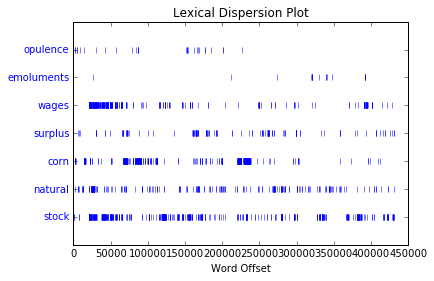

In [11]:
# From the above, we can see that there might be something interesting, 
# but that there is also a bit of garbage, like the repeated periods.

# What about some words that Smith seems to like? Where do they occur?
WealthOfNationsText.dispersion_plot(["opulence","emoluments","wages","surplus","corn","natural","stock"])

In [12]:
# Here are some concordances, which I guess are fun to look at...
WealthOfNationsText.concordance("opulence")

Displaying 25 of 32 matches:
nce , notwithstanding the superior opulence and improvement of the latter coun
 the corn of England , though , in opulence and improvement , France is perhap
-governed society , that universal opulence which extends itself to the lowest
 foresees and intends that general opulence to which it gives occasion . It is
em all to have derived their great opulence from this inland navigation . All 
 liberal in a society advancing to opulence , than in one that is standing sti
of being a burden , is a source of opulence and prosperity to the parents . Th
ever yet arrived at this degree of opulence . China seems to have been long st
tained to a considerable degree of opulence , it is in itself necessarily slow
to possess those decisive marks of opulence which nobody can possess but thems
ler quantity than in times of more opulence and improvement . Silver must cert
very different . Diminish the real opulence either of Holland or of the territ
he value , as it rises 

In [13]:
WealthOfNationsText.concordance("emoluments")

Displaying 18 of 18 matches:
e natural price , and raise their emoluments , whether they consist in wages o
g it in at four . These different emoluments amount to a good deal more than w
nment , of which almost the whole emoluments were to be divided among people w
dinary revenue , the whole of the emoluments which , except , perhaps , upon s
as such presents , as long as the emoluments of justice , or what may be calle
e been their share of the ancient emoluments of justice ; as the taxes more th
hough accompanied with very small emoluments . The inferior office of justice 
ouble , and in most cases with no emoluments at all , is an object of ambition
itute the far greater part of the emoluments of the judges . After all deducti
e years , and of which the lawful emoluments , even during that term , are so 
s greatest with those to whom the emoluments of their profession are the only 
quently but a small part , of the emoluments of the teacher , of which the gre
t his ease as he can ; 

In [14]:
# Following a little online primer I found, we can define lexical diversity as follows...
def VocabSize(text):
    return len(set(text))
def LexicalDiversity(text):
    return VocabSize(text) / len(text)

In [15]:
# The diversity of the Wealth of Nations is...
print(LexicalDiversity(WealthOfNationsText),VocabSize(WealthOfNationsText))

0.026948143556914425 11652


In [16]:
# A frequency distribution of words in the Wealth of Nations:
fdist=nltk.FreqDist(WealthOfNationsText)
print(fdist)
fdist.most_common(15)

<FreqDist with 11652 samples and 432386 outcomes>


[(',', 35945),
 ('the', 29134),
 ('of', 24063),
 ('.', 11882),
 ('to', 11588),
 ('and', 10174),
 ('in', 8546),
 ('a', 6169),
 ('which', 4812),
 ('is', 4677),
 ('it', 4582),
 ('be', 3816),
 ('that', 3662),
 ('or', 3188),
 ('The', 2986)]

Right off the bat, we see that this will pose a bit of a problem for text analysis - whenever we take a look at a text, we might want to get rid of these words, which is what the ```nltk.stopwords``` is for. 

In [17]:
# Let's get rid of the short words and see what happens - perhaps we want to eventually develop a method that marks
# words as "filler" and looks at words of substance - technical terms, names, etc. For now, let's just get rid of the
# short words 
# Here is how we might select just longer word (note that the [:50] at the end just lists the first 50.
sorted(w for w in set(WealthOfNationsText) if len(w) > 5 and fdist[w] > 5)[:50]

['According',
 'Africa',
 'African',
 'Almost',
 'America',
 'American',
 'Americans',
 'Amsterdam',
 'Annibal',
 'Athens',
 'August',
 'Average',
 'Baltic',
 'Before',
 'Bengal',
 'Besides',
 'Between',
 'Birmingham',
 'Bounties',
 'Bounty',
 'Brazil',
 'Brazils',
 'Britain',
 'British',
 'CHAPTER',
 'Calcutta',
 'Canton',
 'Charles',
 'Chinese',
 'Columbus',
 'Columella',
 'Commerce',
 'December',
 'Denmark',
 'Different',
 'Doctor',
 'Domingo',
 'Droits',
 'During',
 'Edinburgh',
 'Edward',
 'Egyptians',
 'Elizabeth',
 'England',
 'English',
 'Europe',
 'European',
 'Europeans',
 'Except',
 'Expense']

In [18]:
freq2=nltk.FreqDist(nltk.bigrams(WealthOfNationsText))  # Not really all that interesting
freq3=nltk.FreqDist(w for w in WealthOfNationsTokens if len(w) > 5)

In [19]:
freq3.most_common(25)

[('country', 1229),
 ('greater', 1085),
 ('labour', 984),
 ('produce', 935),
 ('therefore', 874),
 ('different', 836),
 ('quantity', 796),
 ('people', 771),
 ('either', 734),
 ('revenue', 680),
 ('capital', 652),
 ('silver', 646),
 ('however', 582),
 ('though', 581),
 ('market', 574),
 ('countries', 571),
 ('always', 562),
 ('expense', 553),
 ('particular', 509),
 ('interest', 509),
 ('proportion', 479),
 ('foreign', 478),
 ('profit', 474),
 ('should', 472),
 ('employed', 459)]

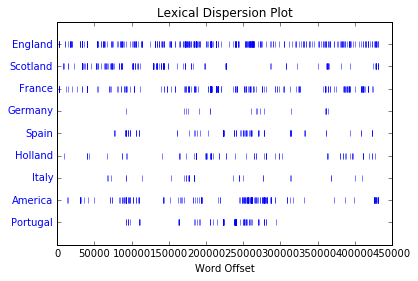

In [20]:
WealthOfNationsText.dispersion_plot(["England","Scotland","France","Germany","Spain","Holland","Italy","America","Portugal"])

I'm not sure how much further I can get with just good old Adam Smith! Let's see if we can find someone else - how about David Ricardo...or better yet - Cantillon or Quesnay! Let's try to stick with Project Gutenberg stuff and see what happens. 

In [21]:
RicardoURL='http://www.gutenberg.org/cache/epub/33310/pg33310.txt'
RicardoHttp=urllib3.PoolManager()
RicardoRaw=RicardoHttp.request('GET',RicardoURL)

In [22]:
RicardoRaw.data[:1000]

b"\xef\xbb\xbfThe Project Gutenberg EBook of On The Principles of Political Economy, and\r\nTaxation, by David Ricardo\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: On The Principles of Political Economy, and Taxation\r\n\r\nAuthor: David Ricardo\r\n\r\nRelease Date: July 31, 2010 [EBook #33310]\r\n[This file last updated January 20, 2011]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK PRINCIPLES OF POLITICAL ECONOMY ***\r\n\r\n\r\n\r\n\r\nProduced by Fritz Ohrenschall, Turgut Dincer and the Online\r\nDistributed Proofreading Team at http://www.pgdp.net (This\r\nfile was produced from images generously made available\r\nby the Posner Memorial Collection\r\n(http://posner.library.cmu.edu/Posner/))\r\n\r\n\r\n\r\n\r\n\r\n\r\

In [23]:
# Decode the data so we can work with it and get rid of the Gutenberg crap at the beginning and end...
PrinciplesRicardo=RicardoRaw.data.decode()
start=PrinciplesRicardo.find("THE PRINCIPLES")
end=PrinciplesRicardo.find("END OF THIS PROJECT GUTENBERG")
PrinciplesRicardo=PrinciplesRicardo[start:end]

# Now see if we can tokenize it and otherwise pound it into shape! 
PrinciplesRicardoTokens=nltk.word_tokenize(PrinciplesRicardo)
PrinciplesRicardoText=nltk.Text(PrinciplesRicardoTokens)
PrinciplesRicardoWords=[words.lower() for words in PrinciplesRicardoTokens]

In [24]:
# Do some of the same stuff we did for the Wealth of Nations.   
PrinciplesRicardoText.collocations()

raw produce; per cent; Adam Smith; per cent.; natural price; Mr.
Malthus; precious metals; Mr. Buchanan; relative value; exchangeable
value; per annum; Dr. Smith; per quarter; take place; market price;
high price; foreign trade; greater quantity; would fall; paper money


In [25]:
# Interesting...what about references to his buddy Malthus?
PrinciplesRicardoText.concordance('Malthus')

Displaying 25 of 53 matches:
 profit , and wages . In 1815 , Mr. Malthus in his `` Inquiry into the Nature a
 Supply on Prices_ 542 XXIX . _Mr . Malthus 's Opinions on Rent_ 549 CHAPTER I 
y developed by the able hand of Mr. Malthus ; and every friend to the poor must
the following able passage from Mr. Malthus 's work on population , which appea
eir production . CHAPTER XXIX . MR. MALTHUS 'S OPINIONS ON RENT . Although the 
ence are the most indebted . Of Mr. Malthus 's Essay on Population , I am happy
 it is so eminent an ornament . Mr. Malthus too -- has satisfactorily explained
ssage , quoted from his work by Mr. Malthus , I fully agree ; and therefore I m
d therefore I must dissent from Mr. Malthus 's comment on them . `` In this vie
 and manufactured commodities , Mr. Malthus asks , `` Is it possible then , wit
ing a rent . In another part of Mr. Malthus 's `` inquiry '' he observes , `` t
ing of the high price of corn , Mr. Malthus evidently does not mean the price p
 excess is 

In [26]:
PrinciplesRicardoText.concordance('Smith')

Displaying 25 of 152 matches:
by the writings of Turgot , Stuart , Smith , Say , Sismondi , and others , they
from the surface of the earth . Adam Smith , and the other able writers to whom
ose passages in the writings of Adam Smith from which he sees reason to differ 
ciated and applied the principles of Smith , and who has done more than all oth
uction_ 449 XXII . _Doctrine of Adam Smith concerning the Rent of Land_ 458 XXI
VALUE . It has been observed by Adam Smith , that `` the word Value has two dif
 price of every thing , '' says Adam Smith , `` what every thing really costs t
very diminution must lower it . Adam Smith , who so accurately defined the orig
 commodities compared with it . Adam Smith , after most ably shewing the insuff
t then be correct , to say with Adam Smith , `` that as labour may sometimes _p
- but it is correct to say , as Adam Smith had previously said , '' that the pr
lth of Nations , '' that though Adam Smith fully recognized the principle , tha
necessary 

In [27]:
# As a preview before we start comparison, let's take a look at these two:
print("Ricardo Diversity and Length: ",LexicalDiversity(PrinciplesRicardoText),
      VocabSize(PrinciplesRicardoText))
print("Smith Diversity and length:   ",LexicalDiversity(WealthOfNationsText),
      VocabSize(WealthOfNationsText))

Ricardo Diversity and Length:  0.04330389363016094 5820
Smith Diversity and length:    0.026948143556914425 11652


# Moving on - comparison!

Now that we have two texts, let's see where we can take it all in terms of comparison of texts. What are some basic tools for comparing the similarity of different texts? From just surfing around the web, I found a source <a href='http://stackoverflow.com/questions/8897593/similarity-between-two-text-documents'>here</a> on Stack Overflow - where else? - that gives some rough information about how to do this using the sklearn module. Evidently, what one would like to do is transform the documents into tf-idf vectors, whatever the hell those are. 

The basic idea is to tabulate how frequently words occur in each document, and then compare the resulting tabulations using some standard method - usually something like cosine_similarity. We might also do ngram similarity, but let's stick with cosine similarity for now. We have:

In [28]:
# Necessary functions for comparison once we have the two vectors
# Note we had to treat the resulting long vectors with kid gloves, as they often 
# create numerical overflow problems. Accordingly, we use normalized vectors - divide each vector by its length

def cosine_sim(u,v):
    a=np.array(u)/len(u)
    b=np.array(v)/len(v)
    return np.dot(a,b) / (sqrt(np.dot(a,a))*sqrt(np.dot(b,b)))

Let's look at the internal structure of the objects created, and think about how they relate to what we want. What I'm guessing is happening is that the Corpus is used to create a vector of words, and then the occurrence of words in the "documents" is tabulated by the program. Anyways, let's take it for a test drive using some of our ideas. First, let's look at what these things are actually producing!

Consider this block of code, which grabs words out of the text (excluding numbers, which are actually quite prevalent in both texts. One reason for this, incidentally, is that page numbers are pulled in with text data. 

In [29]:
WealthOfNationsClean=re.findall('[a-z]+',WealthOfNations.lower())
PrinciplesRicardoClean=re.findall('[a-z]+',PrinciplesRicardo.lower())

In [30]:
Combined=[]
Combined.append(WealthOfNationsClean)
Combined.append(PrinciplesRicardoClean)

# A final block of code is needed so that we aren't left with a list of lists, but instead
# have one big list with both sources. 
Combined = list(itertools.chain.from_iterable(Combined))


In [31]:
# This method is a little bit more delicate than our vocab counter, as it doesn't have numbers, punctuation, etc. in it. 
# Accordingly, we might redifine a lexical diversity measure to use ..Clean and the getUniqueWords method.

def getUniqueWords(allWords) :
    uniqueWords = [] 
    for i in allWords:
        if not i in uniqueWords:
            uniqueWords.append(i)
    return uniqueWords

def LexDiverse(wordlist):
    return len(getUniqueWords(wordlist))/len(wordlist)

In [32]:
LexDiverse(WealthOfNationsClean)

0.025040038774392044

To write a little bit in markup, we now have a means of creating a combined Corpus. What we want to do now is "vectorize"
our two texts. What this amounts to doing is:

1. Comparing each text to the master list. This will require a vector where each entry is a word that occurs in the master list. Once we have a master list, we can pick out just the unique elements in the list. 
2. Once the text has been vectorized, we can then use the cosine measure as a way of calculating the similarity between the two texts. 



In [33]:
Combined[:25]

['an',
 'inquiry',
 'into',
 'the',
 'nature',
 'and',
 'causes',
 'of',
 'the',
 'wealth',
 'of',
 'nations',
 'by',
 'adam',
 'smith',
 'introduction',
 'and',
 'plan',
 'of',
 'the',
 'work',
 'the',
 'annual',
 'labour',
 'of']

In [34]:
# This causes a lot of problems because it has so many "stop words"...clean them out!
CombinedCorp=[word for word in set(Combined) if word not in stopwords.words('english')]
# Gotta love the way you can pile on the commands in one line in Python!

WONVec=[WealthOfNationsClean.count(word) for word in CombinedCorp]
PRVec=[PrinciplesRicardoClean.count(word) for word in CombinedCorp]

In [35]:
len(WONVec),len(PRVec)

(10292, 10292)

In [36]:
cosine_sim(WONVec,PRVec)

0.67720136846738399

In [37]:
# An interesting result - which words are appearing multiple times?
MultList=[]
for i in range(0,len(CombinedCorp)):
    if WONVec[i]>20 and PRVec[i]>20:
        MultList.append((CombinedCorp[i],WONVec[i],PRVec[i]))

# How long is that list? 
print(len(MultList))
print(MultList[:40])

432
[('things', 121, 80), ('smaller', 129, 23), ('producing', 35, 42), ('poor', 154, 71), ('long', 209, 33), ('could', 659, 235), ('fertile', 49, 39), ('law', 232, 21), ('lower', 102, 78), ('probably', 205, 42), ('landlords', 35, 55), ('war', 203, 21), ('would', 1266, 1420), ('fall', 172, 312), ('rate', 207, 197), ('difficulty', 42, 57), ('whatever', 151, 79), ('usual', 59, 44), ('consumer', 41, 72), ('two', 621, 120), ('state', 411, 119), ('cases', 153, 33), ('imposed', 127, 21), ('former', 150, 64), ('fish', 24, 24), ('share', 116, 23), ('national', 40, 32), ('another', 323, 100), ('see', 44, 28), ('low', 83, 55), ('distribution', 25, 31), ('course', 143, 21), ('high', 204, 126), ('employment', 233, 92), ('capitals', 113, 33), ('made', 302, 122), ('regulated', 94, 66), ('agriculture', 127, 59), ('still', 328, 52), ('employed', 459, 238)]


So it is not enormously insightful...in any case, it is perhaps better to move on to the next thing now. Let's start setting up a corpus of a group of economics texts. [A supporting notebook](PDFs.ipynb) details how one can read in a pdf-type document and translate it into text. We will do this [in a new notebook](EconCorpus.ipynb).